In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import numpy as np

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [13]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

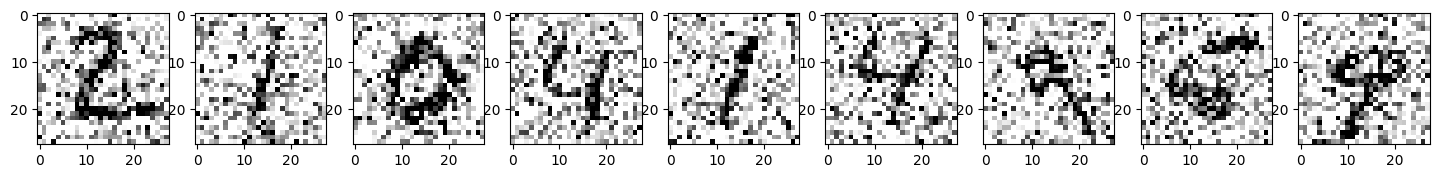

In [16]:
plt.figure(figsize=(20,2))
for i in range(1,10):
  ax = plt.subplot(1, 10, i)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap='binary')
plt.show()

In [22]:

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3,3), activation = 'relu', padding = 'same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x_train_noisy, x_train, epochs = 10, batch_size = 256, shuffle = True, validation_data=(x_test_noisy, x_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 8)           │           2,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 401ms/step - loss: 0.0667 - val_loss: 0.0390
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 151s 440ms/step - loss: 0.0368 - val_loss: 0.0321
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 450ms/step - loss: 0.0316 - val_loss: 0.0294
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 425ms/step - loss: 0.0288 - val_loss: 0.0273
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 135s 396ms/step - loss: 0.0272 - val_loss: 0.0258
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 397ms/step - loss: 0.0260 - val_loss: 0.0248
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 396ms/step - loss: 0.0250 - val_loss: 0.0242
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 390ms/step - loss: 0.0243 - val_loss: 0.0238
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 391ms/step - loss: 0.0238 - val_loss: 0.0234
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 402ms/step - loss: 0.0234 - val_loss: 0.0233


In [23]:
model.evaluate(x_test_noisy, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0235


0.02330899052321911

In [25]:
model.save('denoising_autoencoder.h5')

In [26]:
no_noise_img = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


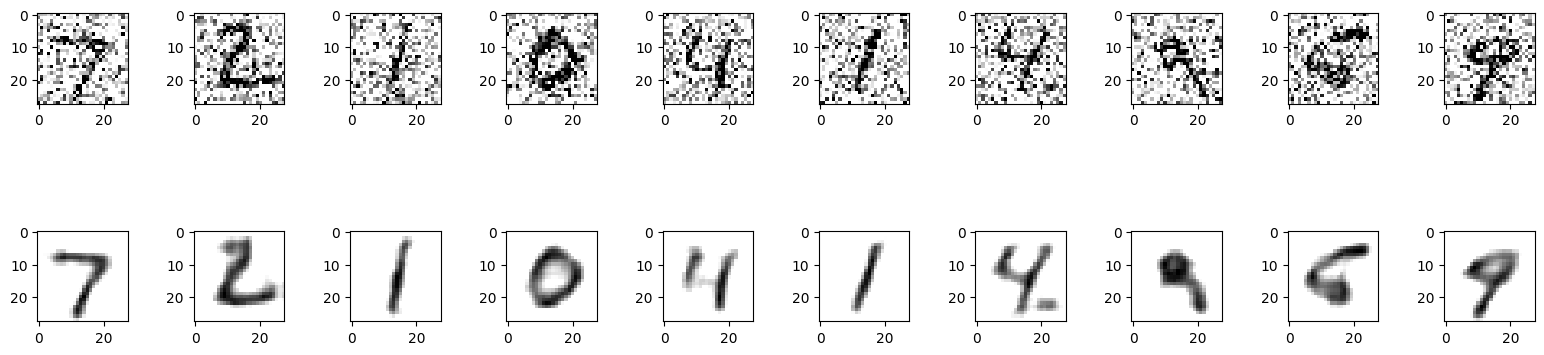

In [27]:
plt.figure(figsize=(40,4))
for i in range(10):
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap = 'binary')

  ax = plt.subplot(3, 20, 40 +i+ 1)
  plt.imshow(no_noise_img[i].reshape(28,28), cmap = 'binary')

plt.show()